**Loading Dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

 

# Show the first few rows
print(data.head())

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   Feature_24  Feature_25  Feature_26  Featu

In [2]:
data.tail(10)  #prints bottom 10 rows

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [3]:
data.shape #prints the size of dataset

(569, 32)

**Preprocessing**

In [4]:
data.duplicated().sum() #checks duplicate values

0

In [5]:
data.isnull().sum()  #check any null value present

ID            0
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64

In [6]:
data.drop('ID', axis=1, inplace=True) #removes the unnecessary column which is not used for 

In [7]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0}) #maps the value basically converts categorical to numerical 

In [8]:
data.head()

,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.describe().T #statistical summary of a dataset

,count,mean,std,min,25%,50%,75%,max
Diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
Feature_1,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
Feature_2,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
Feature_3,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
Feature_4,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
Feature_5,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
Feature_6,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
Feature_7,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
Feature_8,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
Feature_9,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [10]:
import numpy as np
numerical_cols=data.select_dtypes(include=np.number).columns.tolist()
categorical_cols=data.select_dtypes(include='object').columns.tolist()
print(data[numerical_cols])
print(data[categorical_cols])                       #prints the numerical and categorical columns from the DataFrame

     Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0            1      17.99      10.38     122.80     1001.0    0.11840   
1            1      20.57      17.77     132.90     1326.0    0.08474   
2            1      19.69      21.25     130.00     1203.0    0.10960   
3            1      11.42      20.38      77.58      386.1    0.14250   
4            1      20.29      14.34     135.10     1297.0    0.10030   
..         ...        ...        ...        ...        ...        ...   
564          1      21.56      22.39     142.00     1479.0    0.11100   
565          1      20.13      28.25     131.20     1261.0    0.09780   
566          1      16.60      28.08     108.30      858.1    0.08455   
567          1      20.60      29.33     140.10     1265.0    0.11780   
568          0       7.76      24.54      47.92      181.0    0.05263   

     Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  \
0      0.27760    0.30010    0.14710     0.

**Scaling**

In [13]:
#MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the numerical columns for scaling
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Fit and transform the data
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Now, data is scaled between 0 and 1
print(data.head())


   Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0        1.0   0.521037   0.022658   0.545989   0.363733   0.593753   
1        1.0   0.643144   0.272574   0.615783   0.501591   0.289880   
2        1.0   0.601496   0.390260   0.595743   0.449417   0.514309   
3        1.0   0.210090   0.360839   0.233501   0.102906   0.811321   
4        1.0   0.629893   0.156578   0.630986   0.489290   0.430351   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  \
0   0.792037   0.703140   0.731113   0.686364  ...    0.620776    0.141525   
1   0.181768   0.203608   0.348757   0.379798  ...    0.606901    0.303571   
2   0.431017   0.462512   0.635686   0.509596  ...    0.556386    0.360075   
3   0.811361   0.565604   0.522863   0.776263  ...    0.248310    0.385928   
4   0.347893   0.463918   0.518390   0.378283  ...    0.519744    0.123934   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0    0.668310    0.450698  

In [18]:
#Standardization (Z-score Scaling)

# Initialize the scaler
scaler = StandardScaler()

# Select the numerical columns for scaling
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Fit and transform the data
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Now, data is standardized with a mean of 0 and standard deviation of 1
print(data.head())


   Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   1.297676   1.097064  -2.073335   1.269934   0.984375   1.568466   
1   1.297676   1.829821  -0.353632   1.685955   1.908708  -0.826962   
2   1.297676   1.579888   0.456187   1.566503   1.558884   0.942210   
3   1.297676  -0.768909   0.253732  -0.592687  -0.764464   3.283553   
4   1.297676   1.750297  -1.151816   1.776573   1.826229   0.280372   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  \
0   3.283515   2.652874   2.532475   2.217515  ...    1.886690   -1.359293   
1  -0.487072  -0.023846   0.548144   0.001392  ...    1.805927   -0.369203   
2   1.052926   1.363478   2.037231   0.939685  ...    1.511870   -0.023974   
3   3.402909   1.915897   1.451707   2.867383  ...   -0.281464    0.133984   
4   0.539340   1.371011   1.428493  -0.009560  ...    1.298575   -1.466770   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0    2.303601    2.001237  

**Checking Outliers**

In [14]:
#Using the IQR Method
# Create a DataFrame to store outlier information
outlier_info = {}

# Loop through each numerical column to find outliers
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)  # First quartile
    Q3 = data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    # Define the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info[col] = outliers.shape[0]  # Count of outliers
    
    # Optional: Print outliers for each column
    print(f"Outliers in {col}:")
    print(outliers)

# Display the count of outliers for each numerical column
print("Count of Outliers for Each Numerical Column:")
print(outlier_info)


Outliers in Diagnosis:
Empty DataFrame
Columns: [Diagnosis, Feature_1, Feature_2, Feature_3, Feature_4, Feature_5, Feature_6, Feature_7, Feature_8, Feature_9, Feature_10, Feature_11, Feature_12, Feature_13, Feature_14, Feature_15, Feature_16, Feature_17, Feature_18, Feature_19, Feature_20, Feature_21, Feature_22, Feature_23, Feature_24, Feature_25, Feature_26, Feature_27, Feature_28, Feature_29, Feature_30]
Index: []

[0 rows x 31 columns]
Outliers in Feature_1:
     Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
82         1.0   0.863221   0.514034   0.882524   0.735737   0.484517   
108        1.0   0.723603   0.336828   0.753300   0.579215   0.721946   
122        1.0   0.817313   0.354751   0.845899   0.686108   0.831182   
164        1.0   0.770931   0.416977   0.748462   0.654295   0.286720   
180        1.0   0.957878   0.411228   0.955774   0.893531   0.512503   
202        1.0   0.771878   0.573554   0.795453   0.653871   0.554934   
212        1.0   1.000

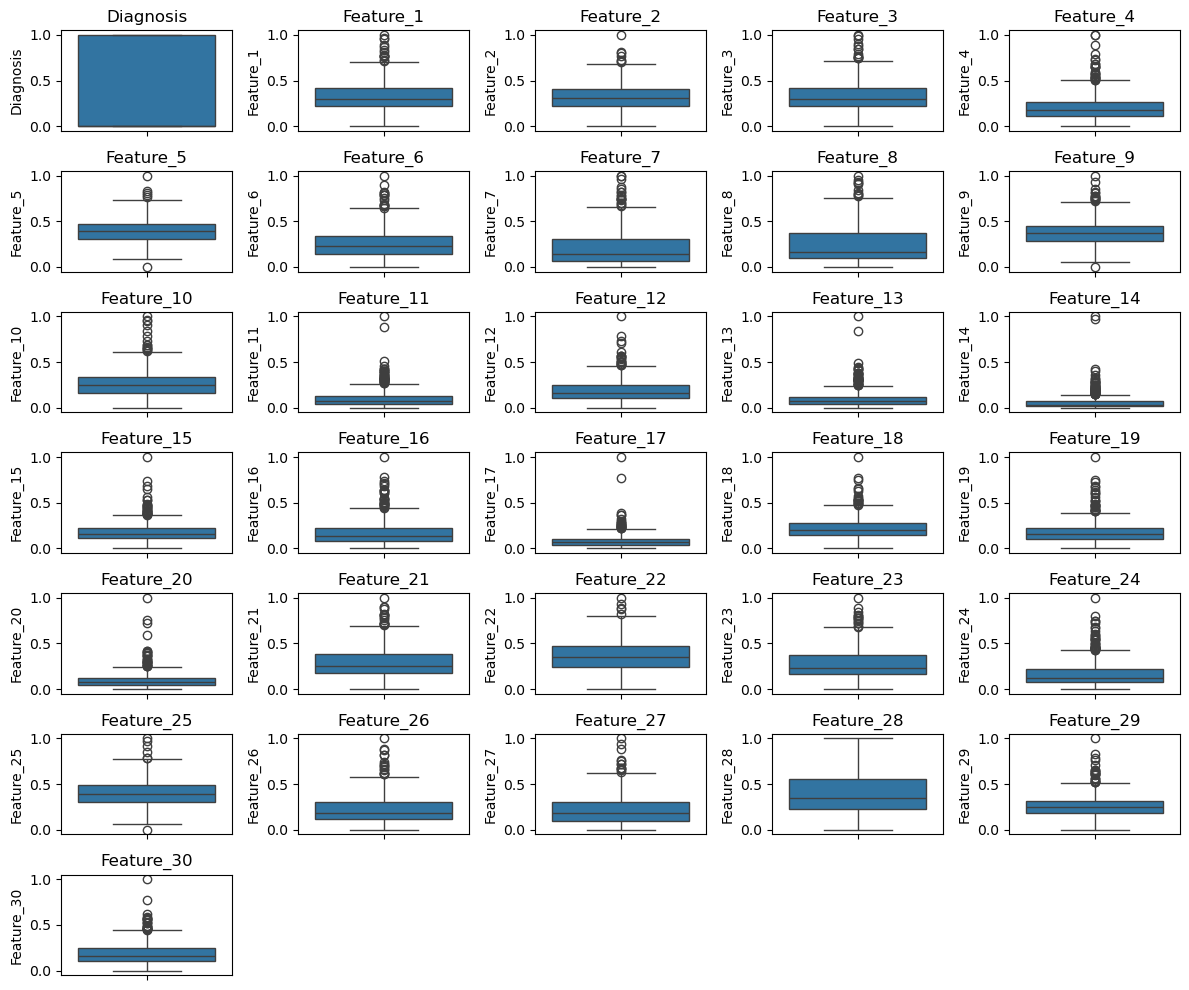

In [16]:
#Using BoxPlots
# Set the figure size for better visibility
plt.figure(figsize=(12, 10))  # Adjust size as needed

# Create a box plot for each numerical feature
for i, col in enumerate(numerical_cols):
    plt.subplot(7, 5, i + 1)  # Adjusting the grid to 7 rows and 5 columns
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


**Visualization**

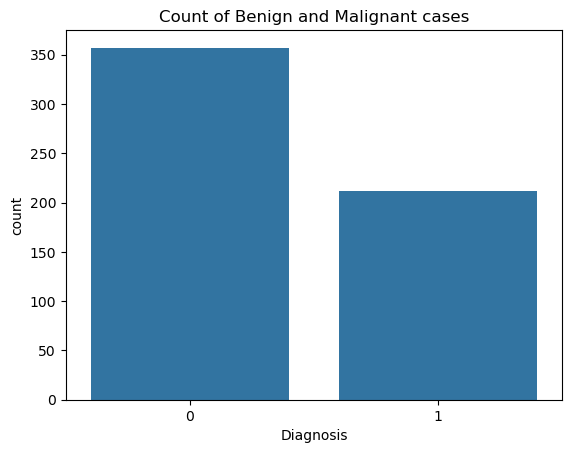

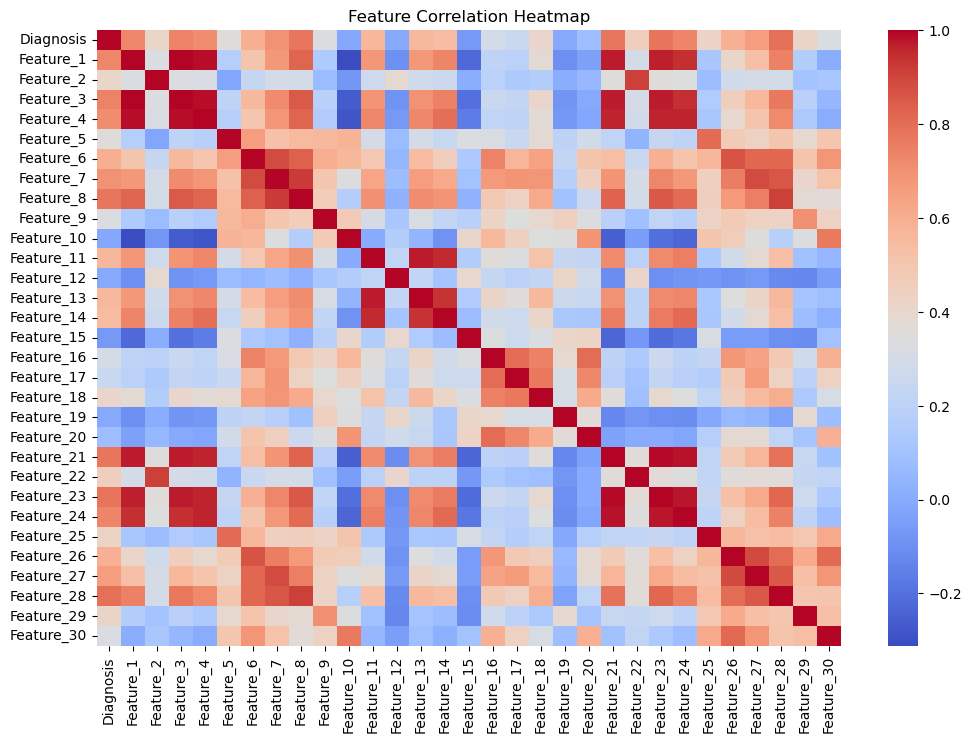

In [11]:


 

# Countplot of the target variable (Benign vs Malignant)
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant cases')
plt.show()

 

# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



**Split the data into train and test**

In [12]:
from sklearn.model_selection import train_test_split

 

# Define features and target variable
X = data.drop('Diagnosis', axis=1)  # All columns except Diagnosis
y = data['Diagnosis']

 

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')



Training data shape: (398, 30)
Testing data shape: (171, 30)
